<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.


# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

base_dir = "../../datasets/csv/telecom/"

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv(base_dir + "train.csv")
data.head().T

,0,1,2,3,4
ClientPeriod,55,72,1,32,60
MonthlySpending,19.5,25.85,75.9,79.3,115.25
TotalSpent,1026.35,1872.2,75.9,2570,6758.45
Sex,Male,Male,Male,Female,Female
IsSeniorCitizen,0,0,0,1,0
HasPartner,Yes,Yes,No,Yes,Yes
HasChild,Yes,No,No,No,Yes
HasPhoneService,Yes,Yes,Yes,Yes,Yes
HasMultiplePhoneNumbers,No,Yes,No,Yes,Yes
HasInternetService,No,No,Fiber optic,Fiber optic,Fiber optic


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
def get_unique_values(column):
    result = column.unique()
    result.sort()
    return result

In [7]:
for col in num_cols:
    print("Уникальные", col)
    print(get_unique_values(data[col]))
    print()

Уникальные ClientPeriod
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

Уникальные MonthlySpending
[ 18.25  18.4   18.7  ... 118.6  118.65 118.75]

Уникальные TotalSpent
[' ' '100.2' '100.25' ... '997.65' '998.1' '999.9']



In [8]:
data["TotalSpent"] = data["TotalSpent"].replace(" ", "0.0").astype(float)
get_unique_values(data["TotalSpent"])

array([   0.  ,   18.8 ,   18.9 , ..., 8670.1 , 8672.45, 8684.8 ])

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [9]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 30.0, 15.0
rcParams["axes.titlesize"] = 30.0
rcParams["font.size"] = 22

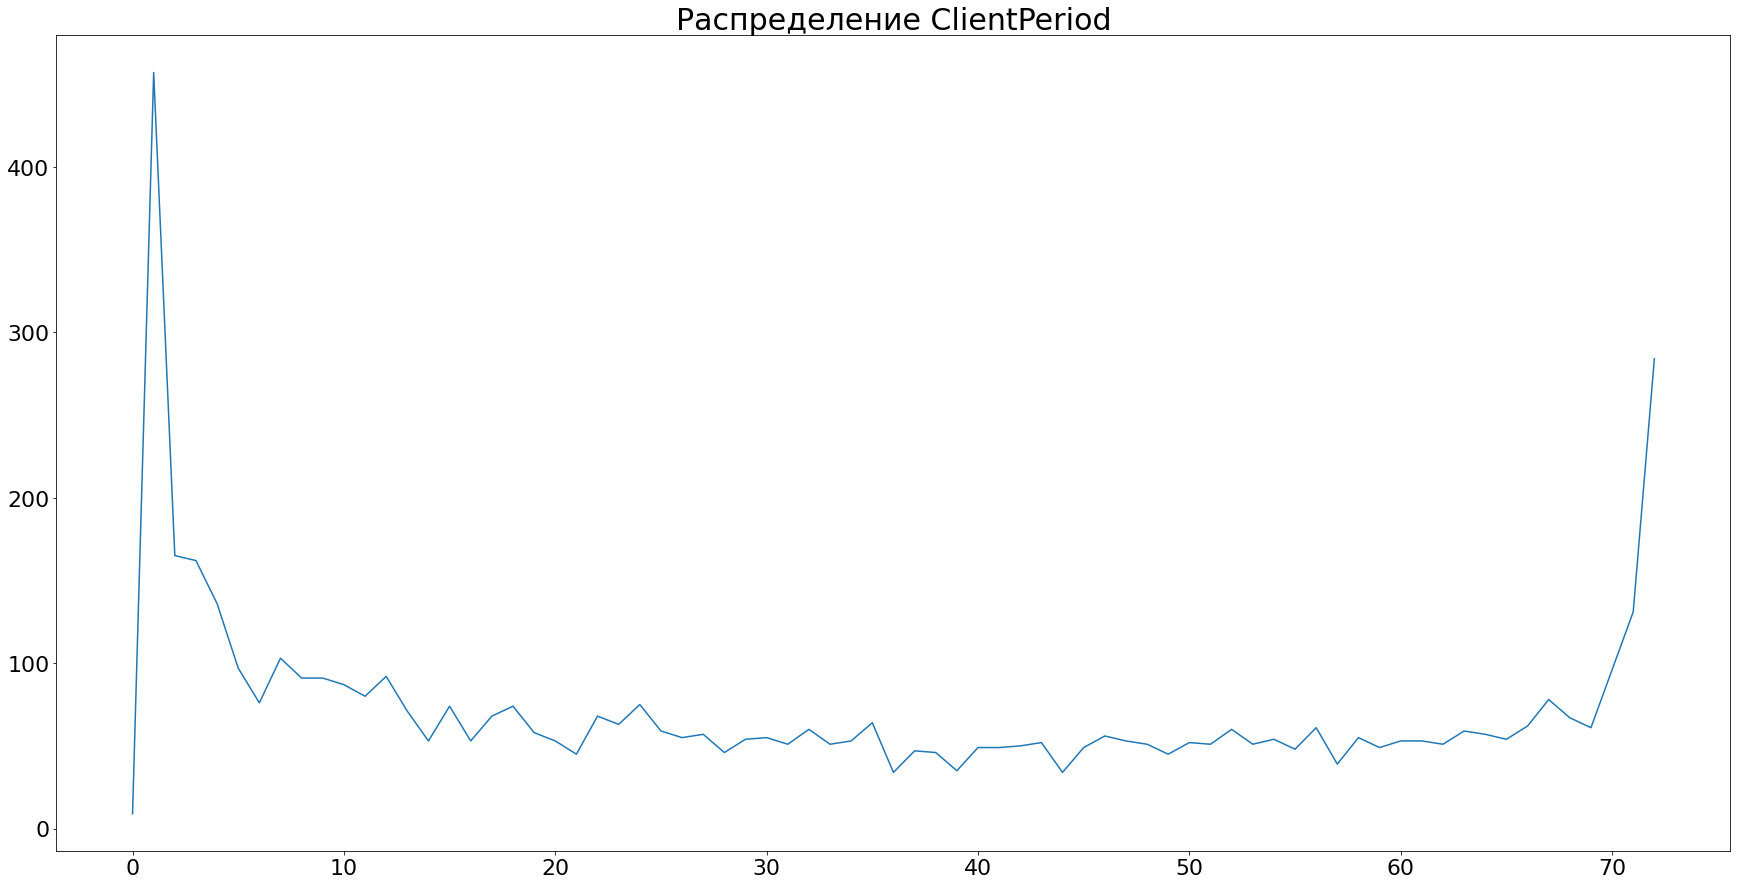

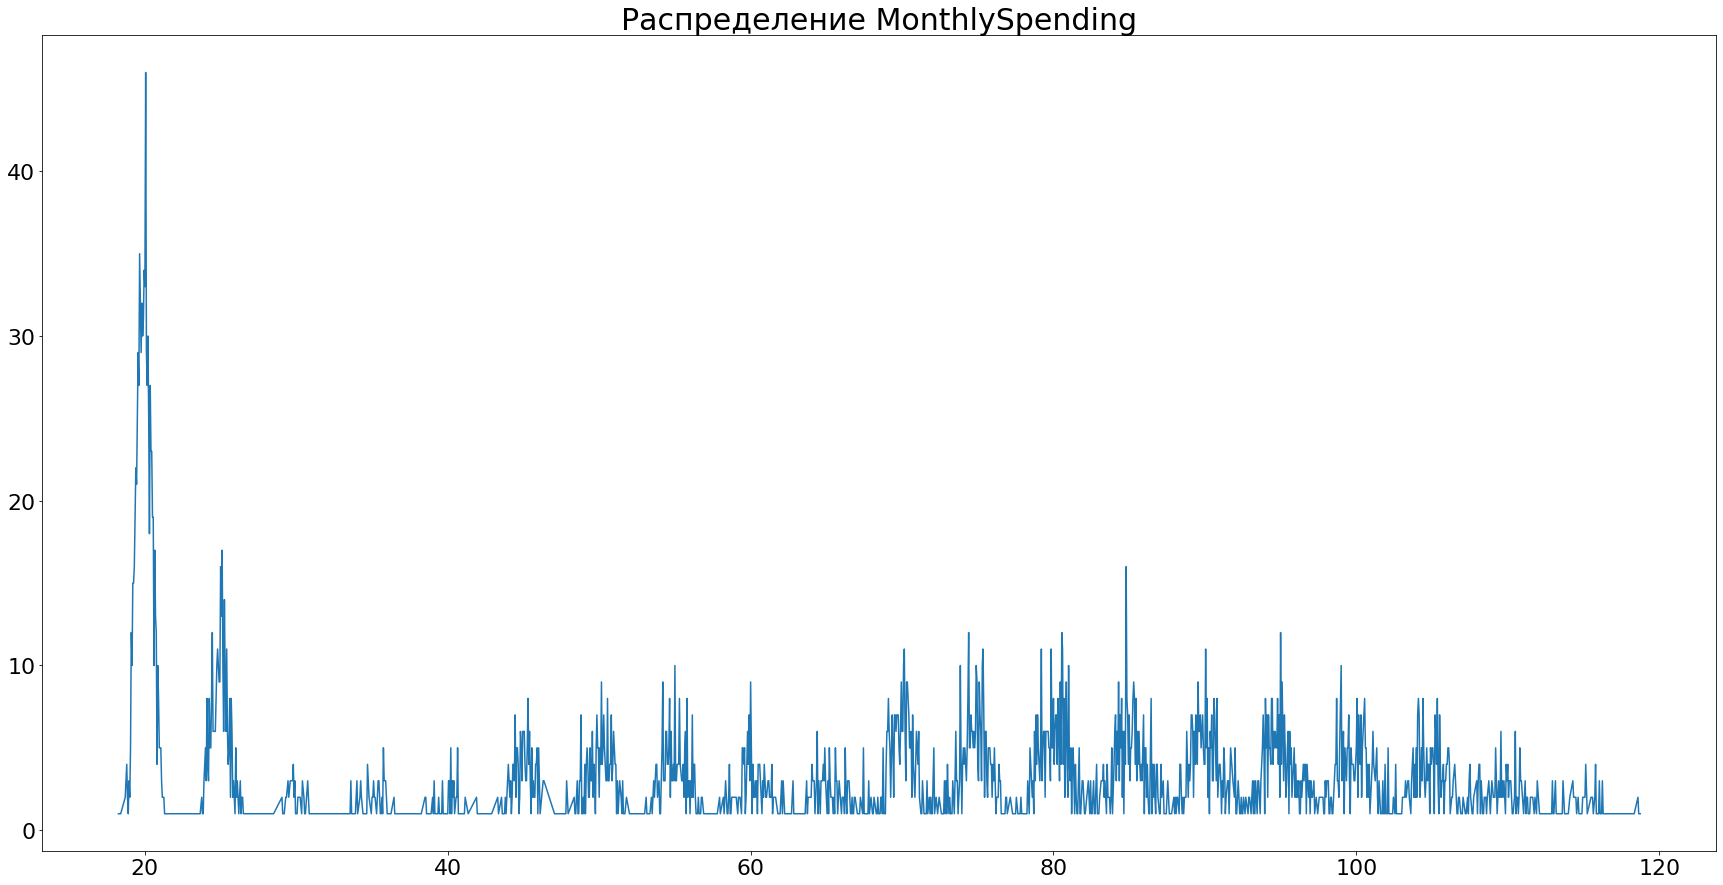

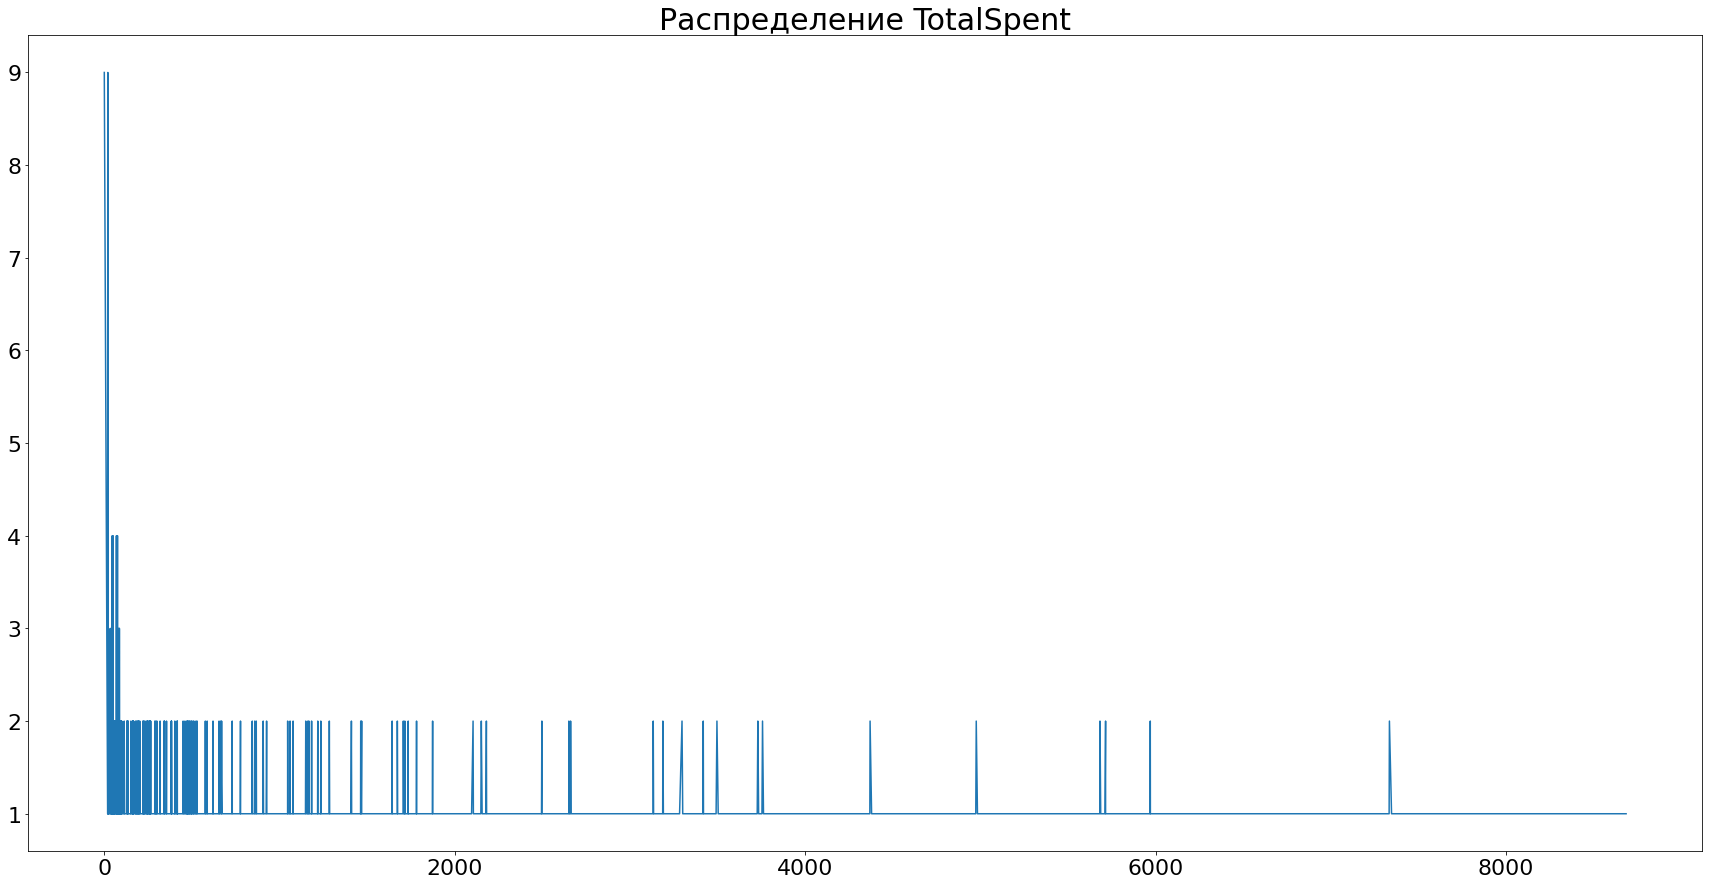

In [14]:
for col in num_cols:
    data[col].value_counts().sort_index().plot()
    plt.title("Распределение " + col)
    plt.show()

In [31]:
for col in cat_cols:
    print("Распределение", col)
    print(data[col].value_counts())
    print()

Распределение Sex
Male      2655
Female    2627
Name: Sex, dtype: int64

Распределение IsSeniorCitizen
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

Распределение HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64

Распределение HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64

Распределение HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

Распределение HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Распределение HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

Распределение HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

Распределение HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBa

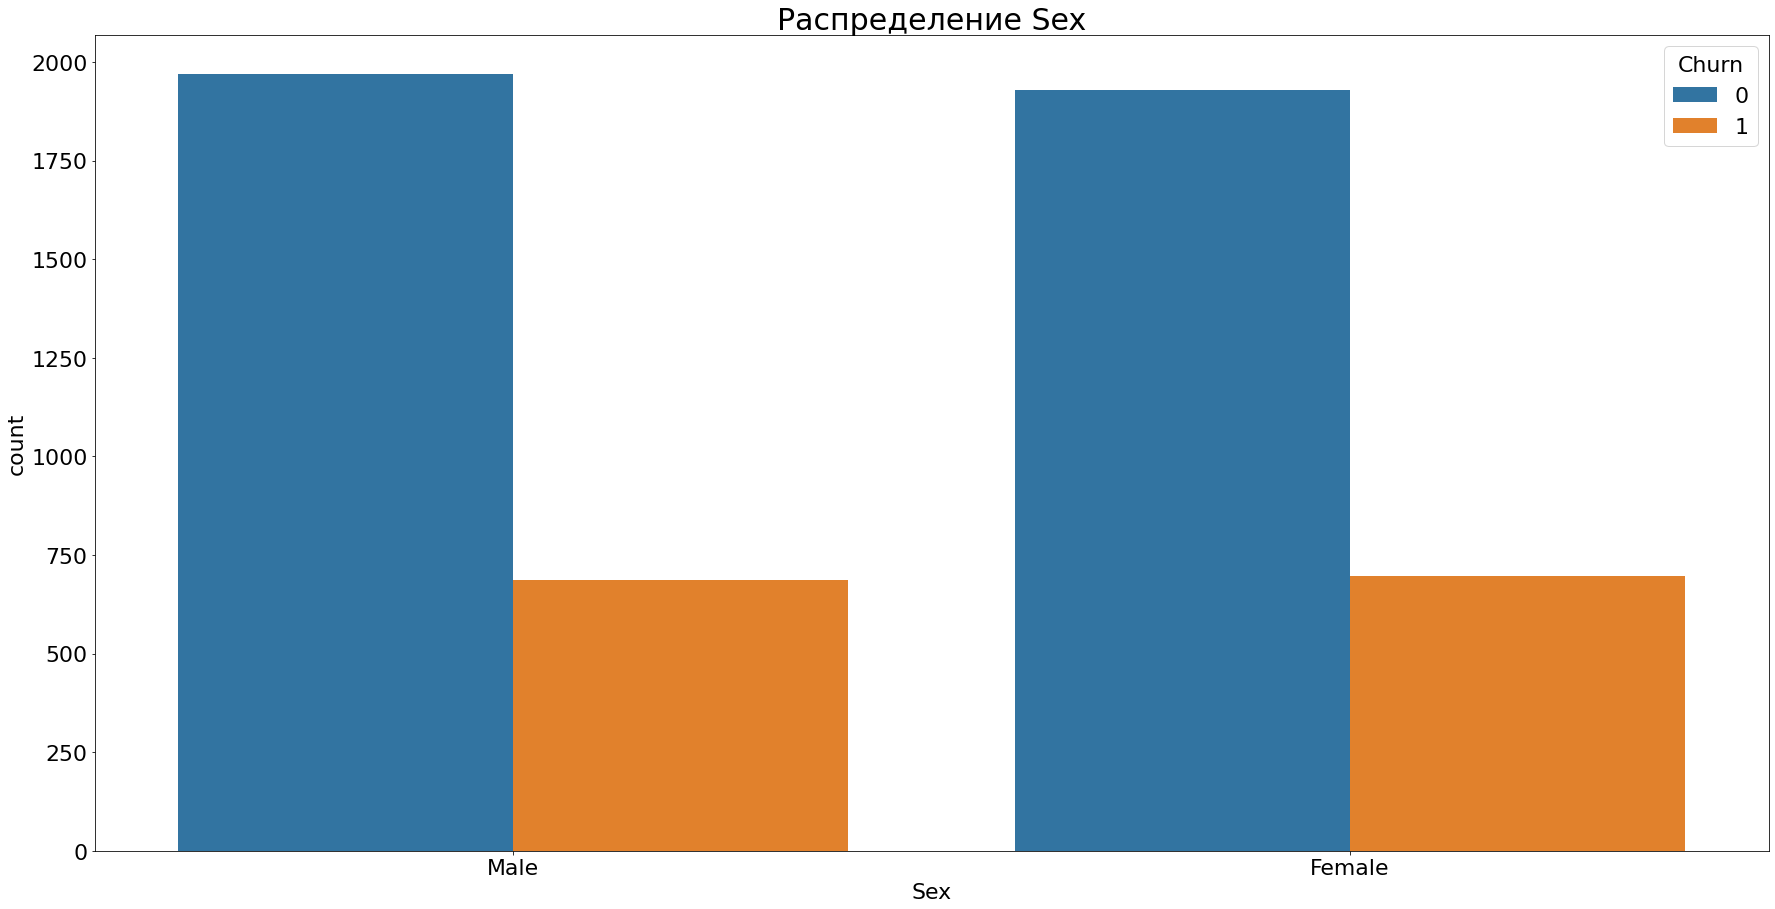

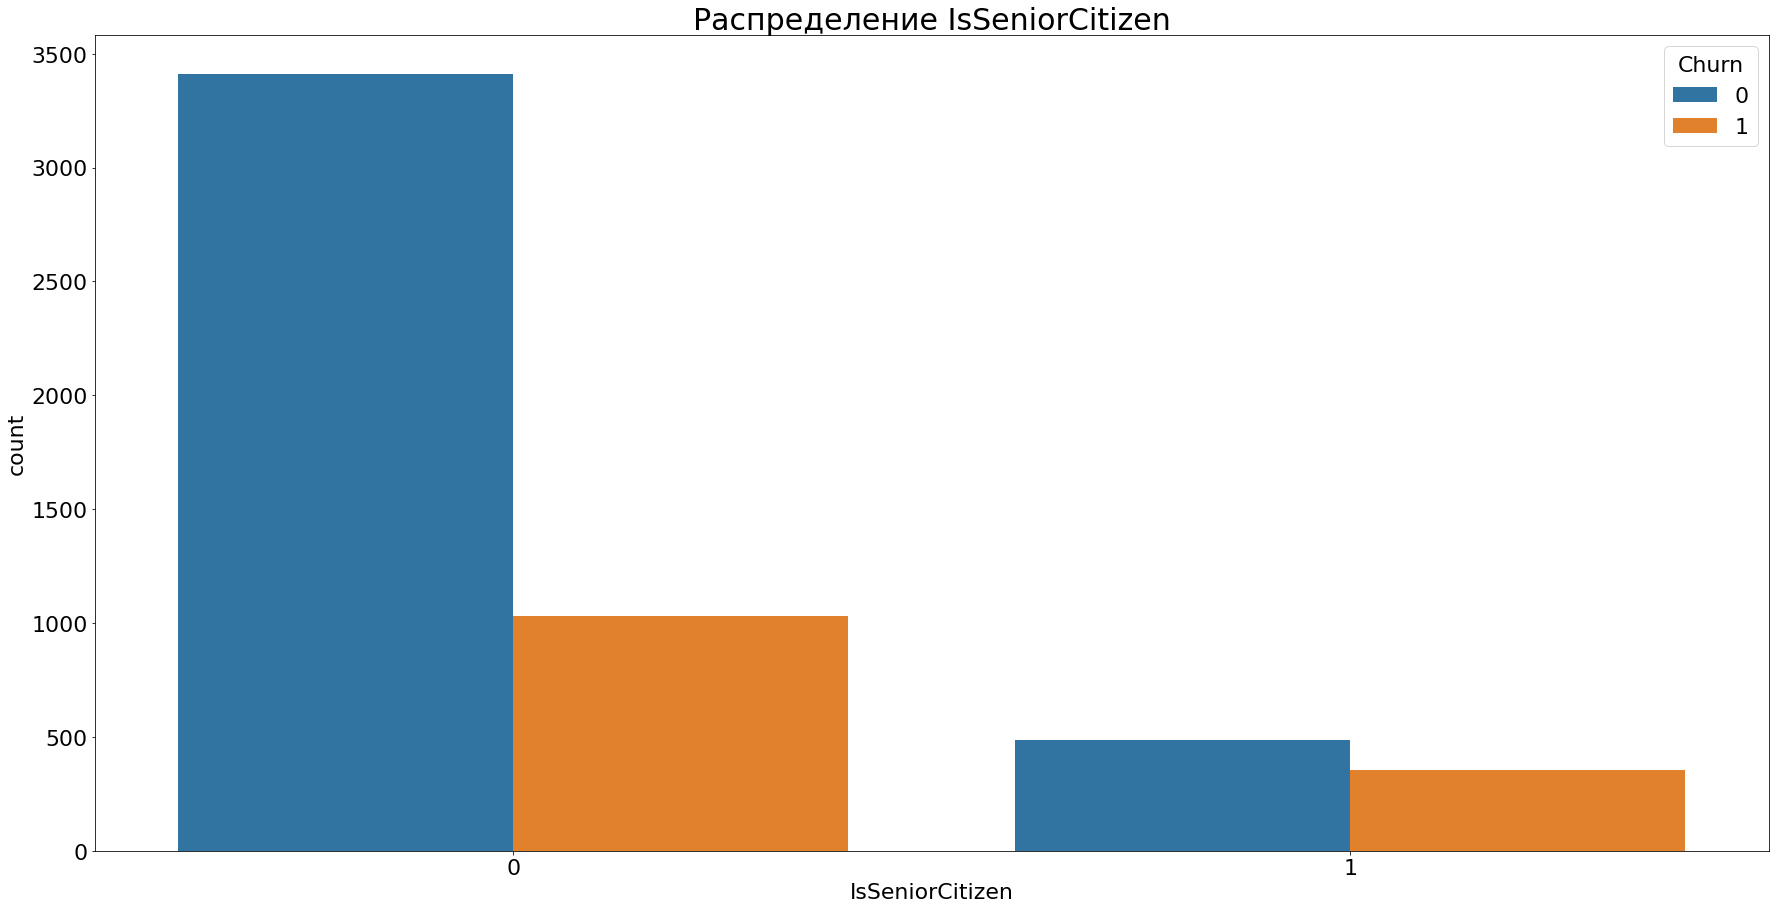

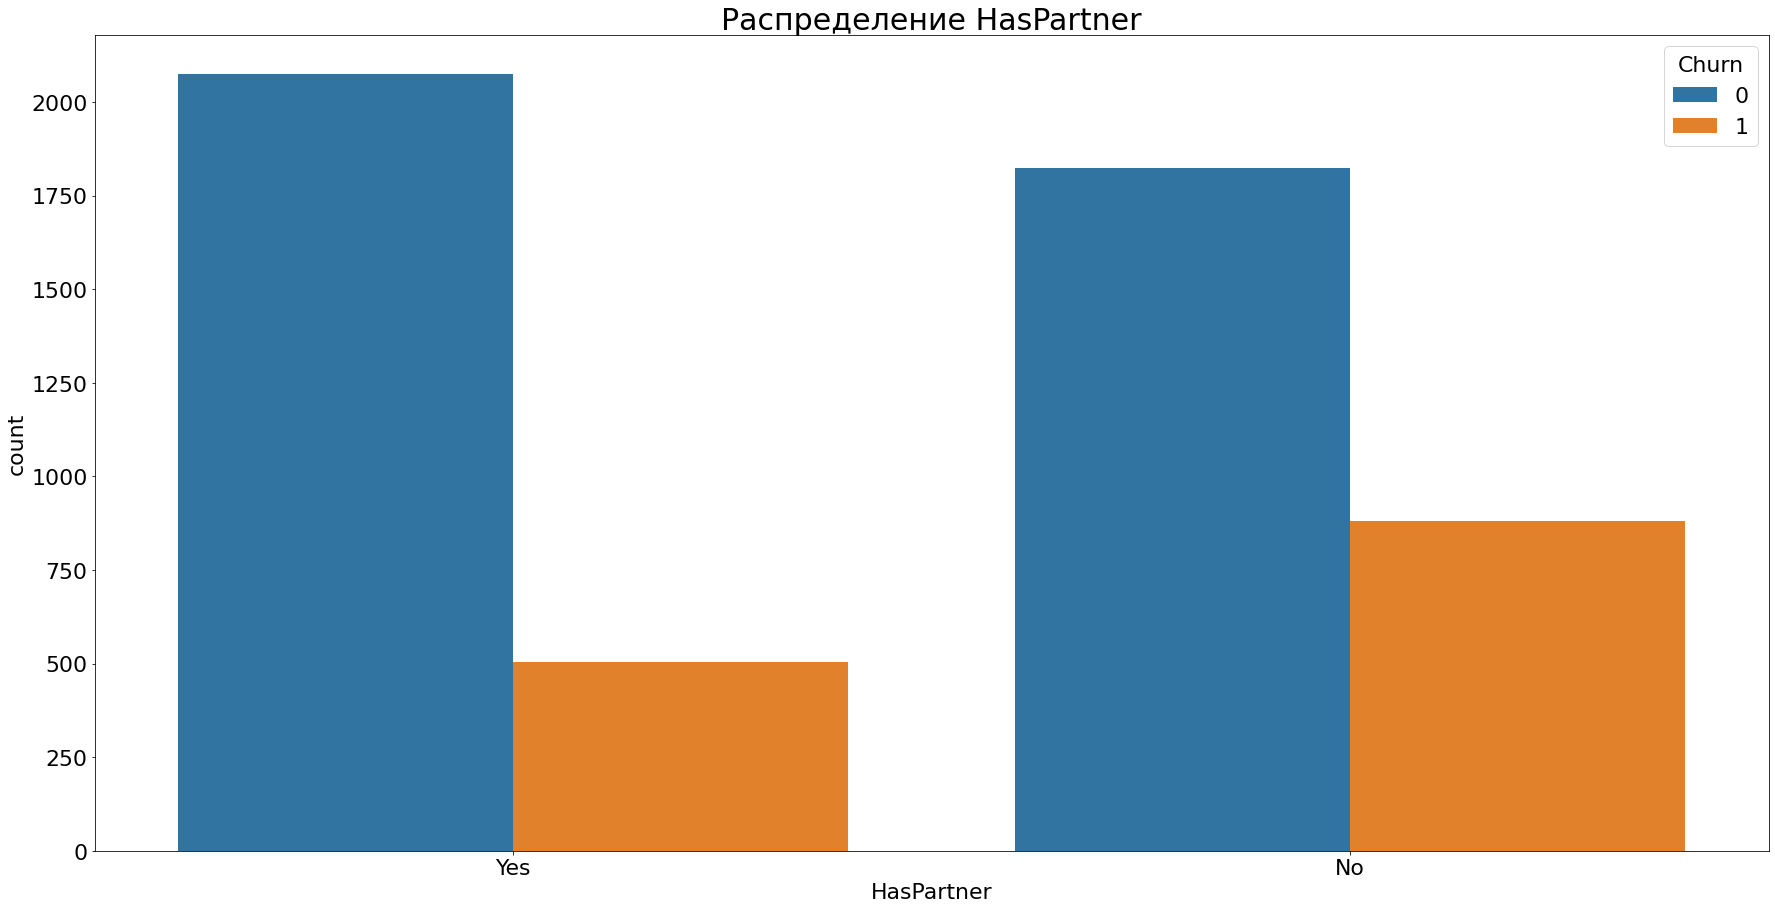

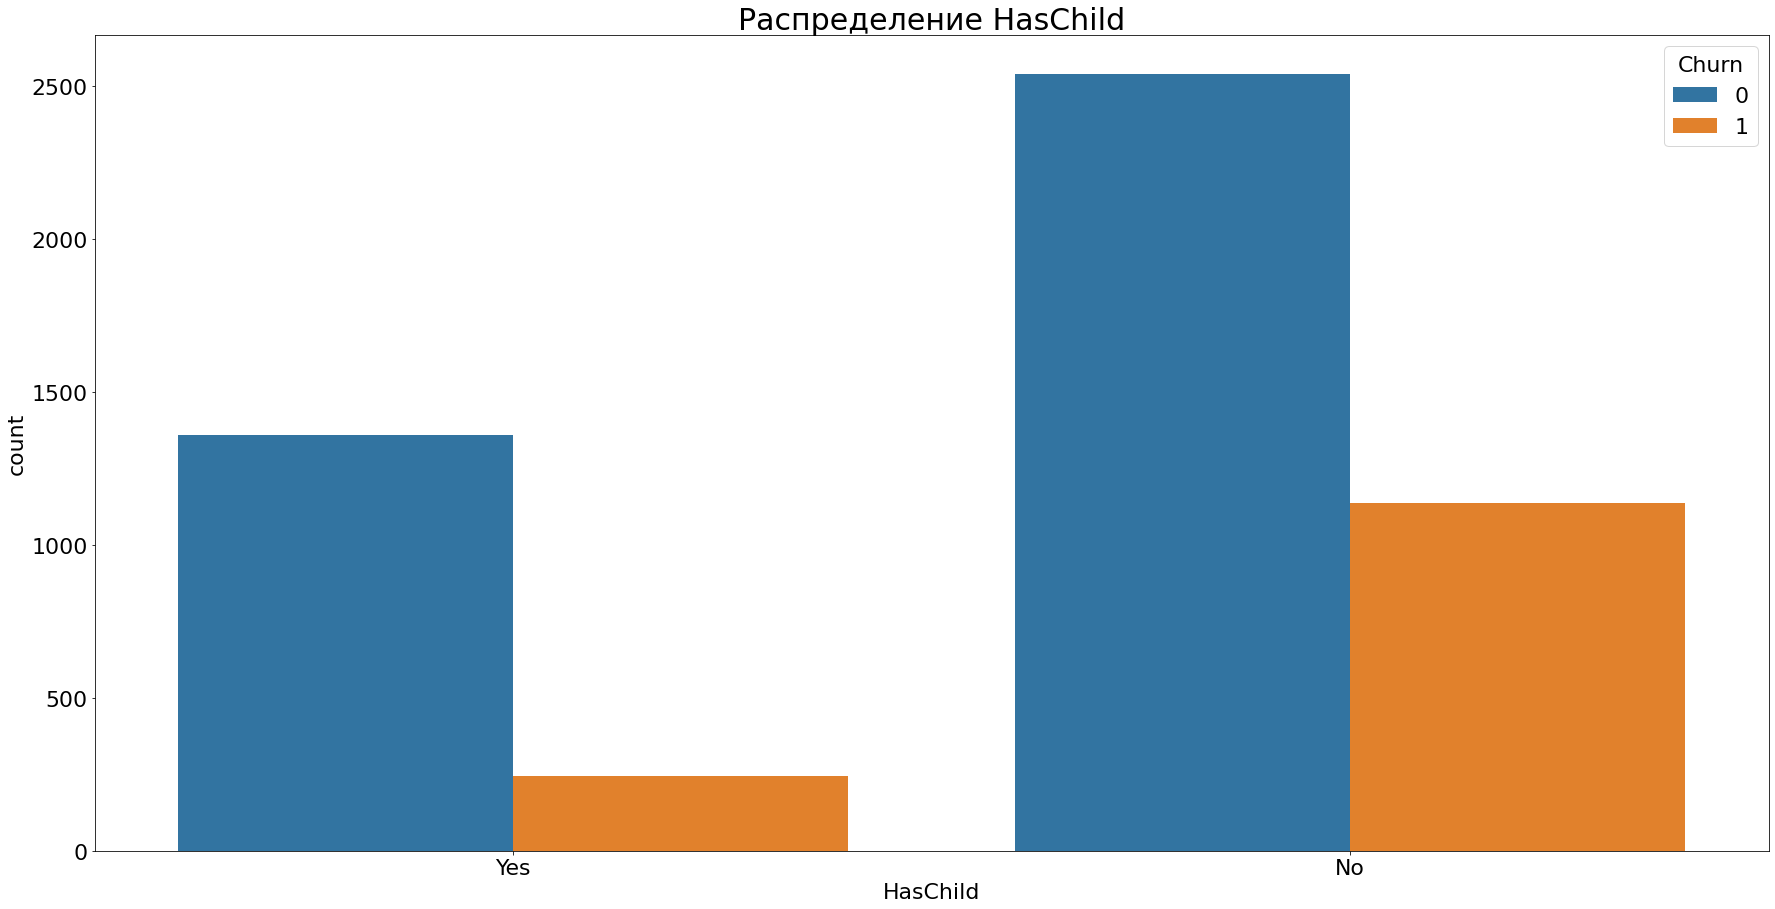

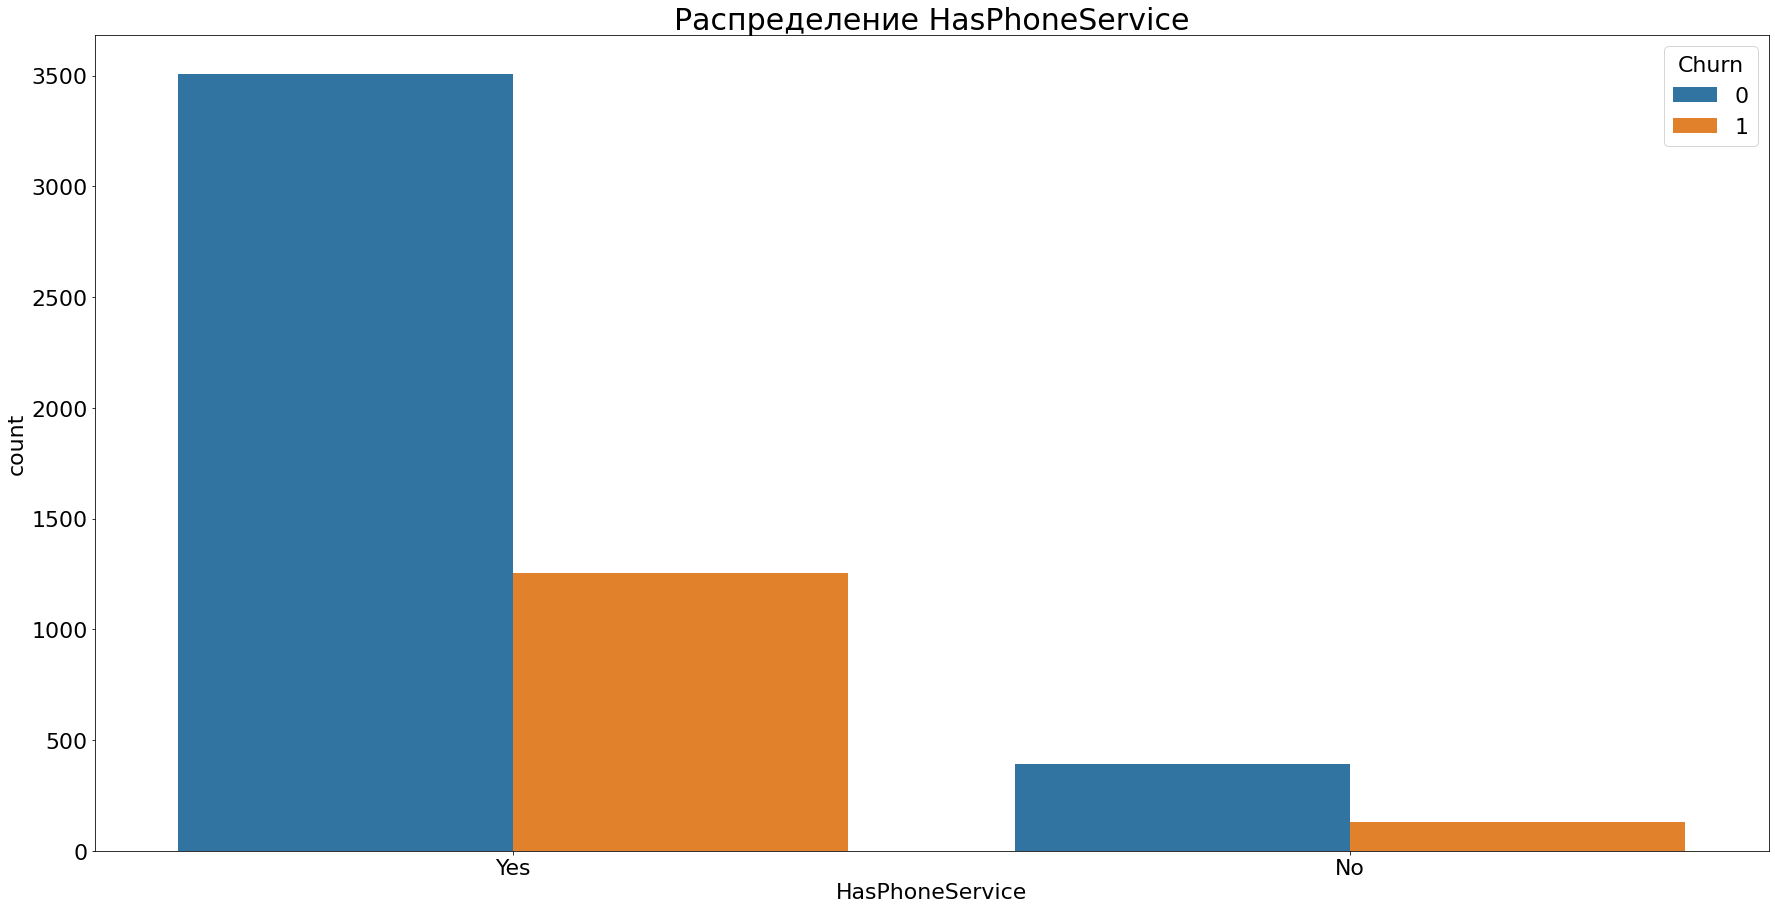

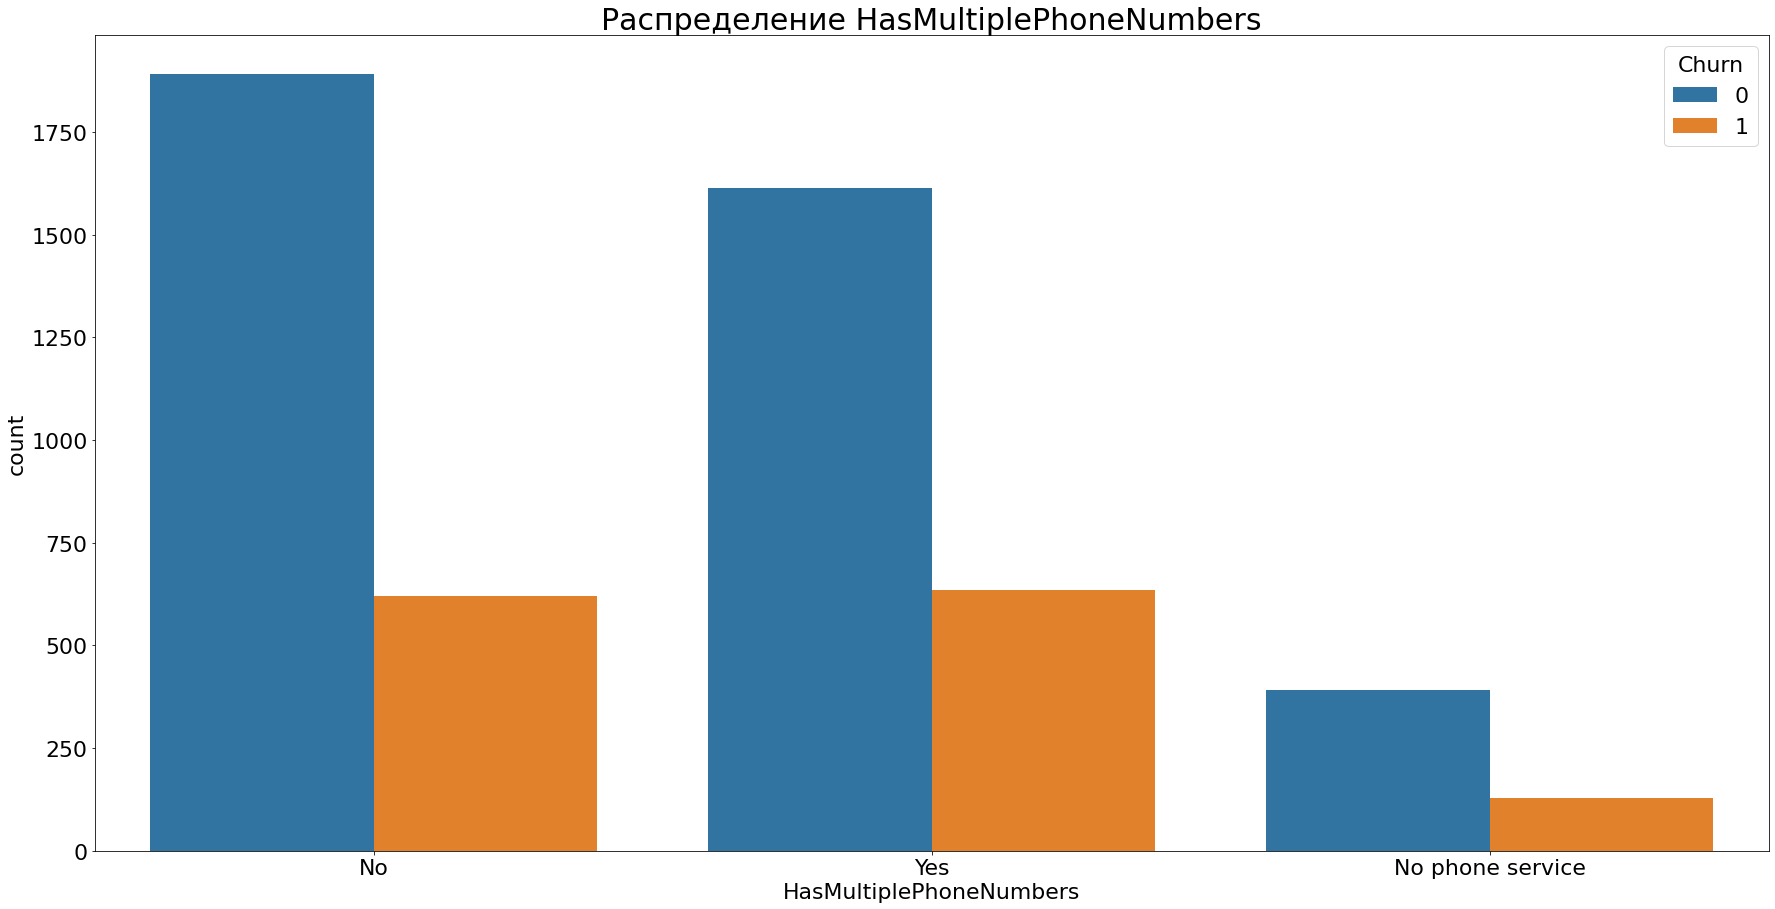

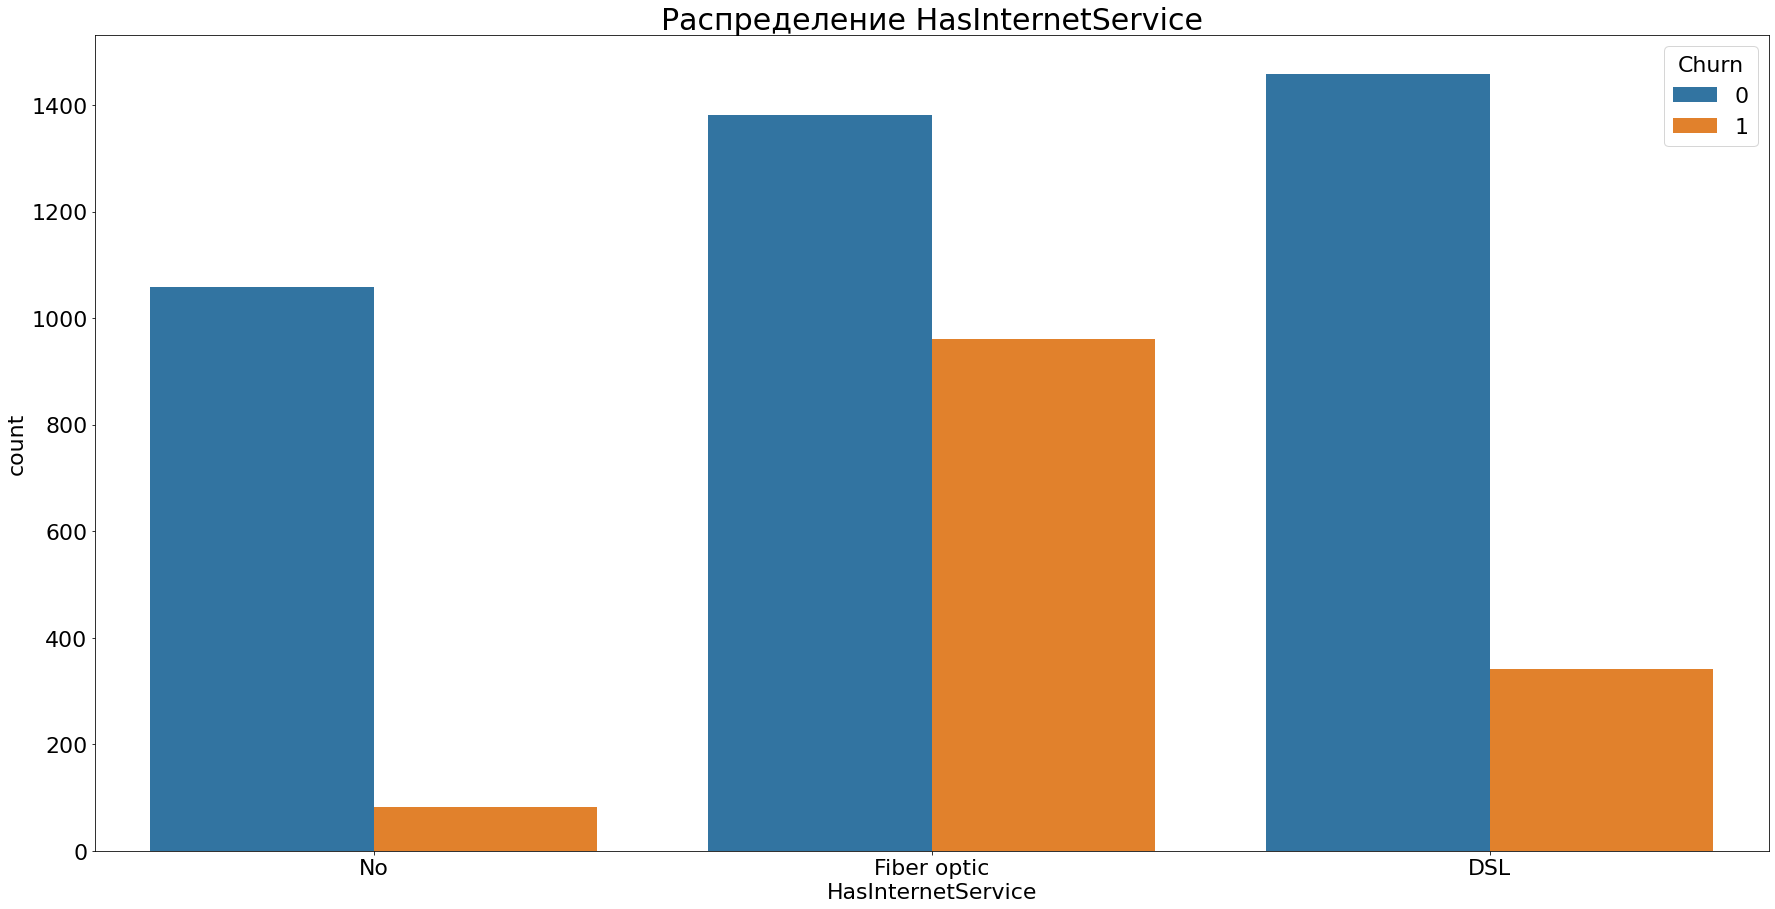

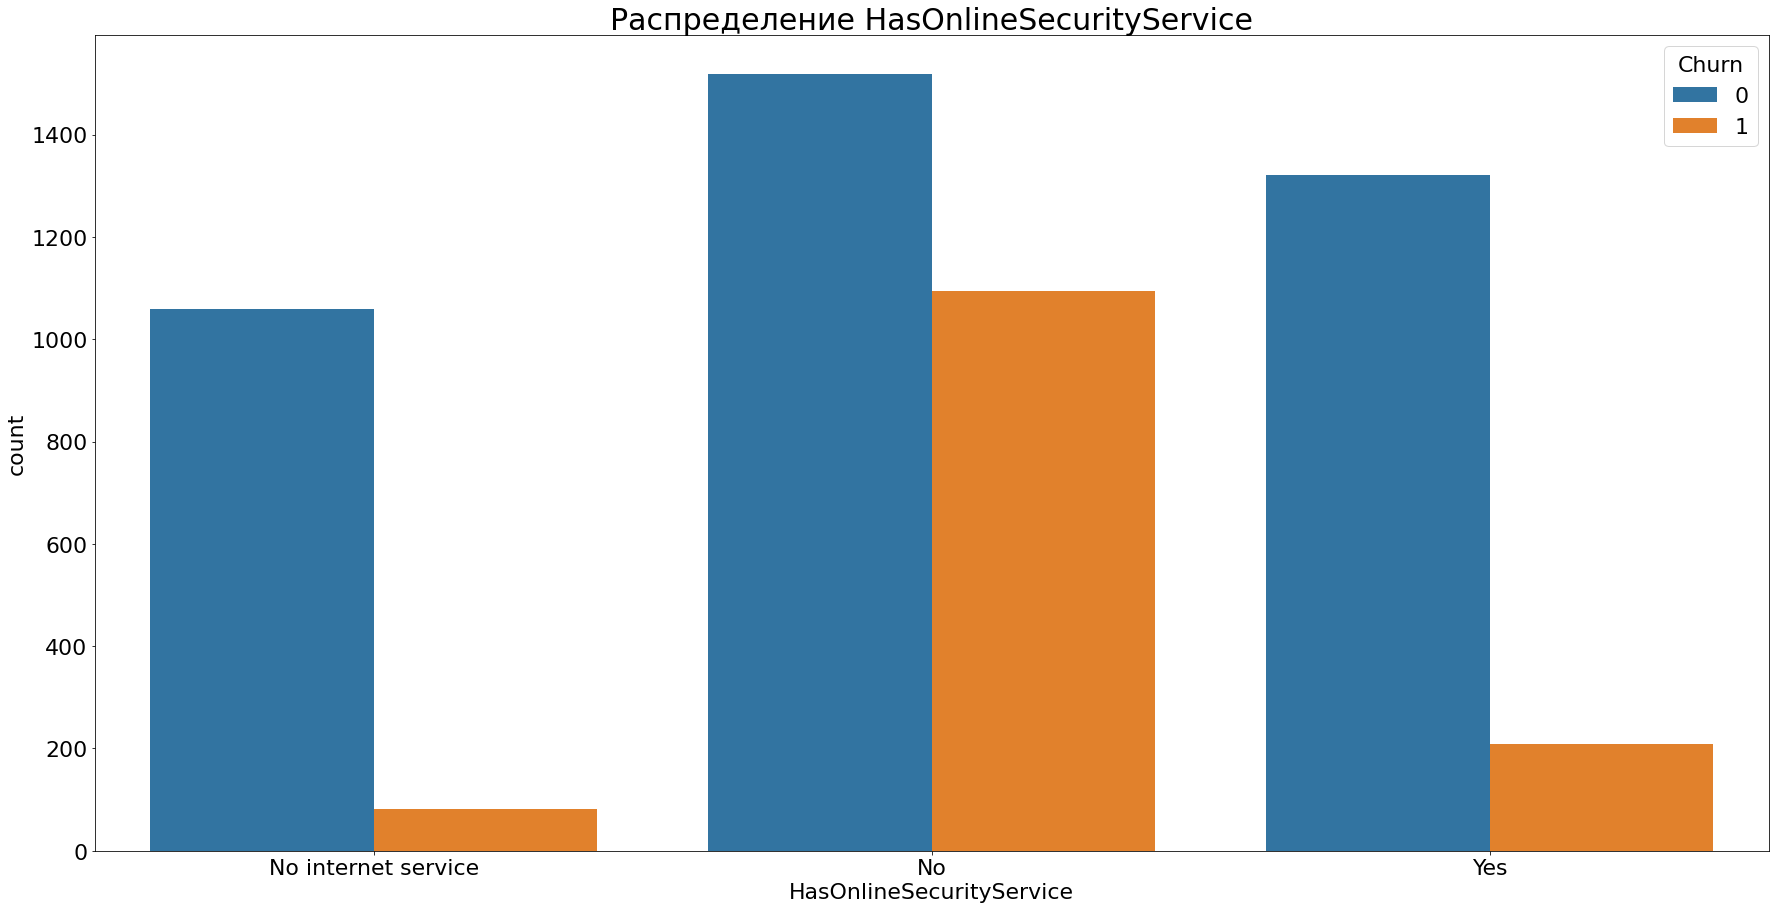

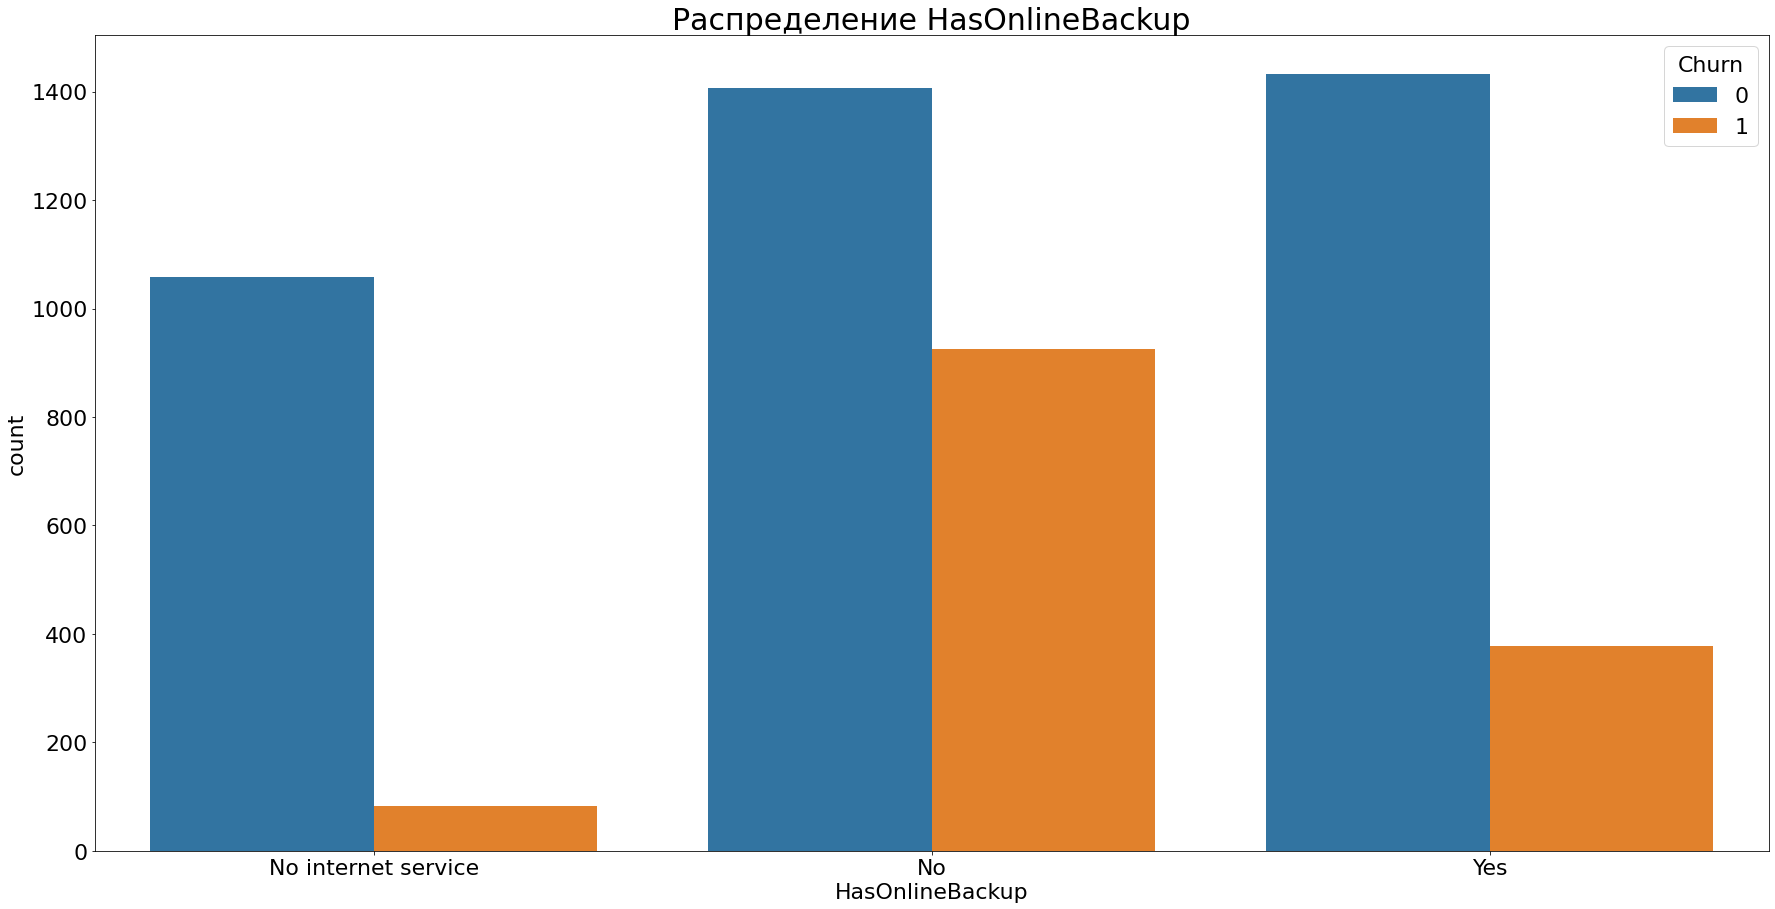

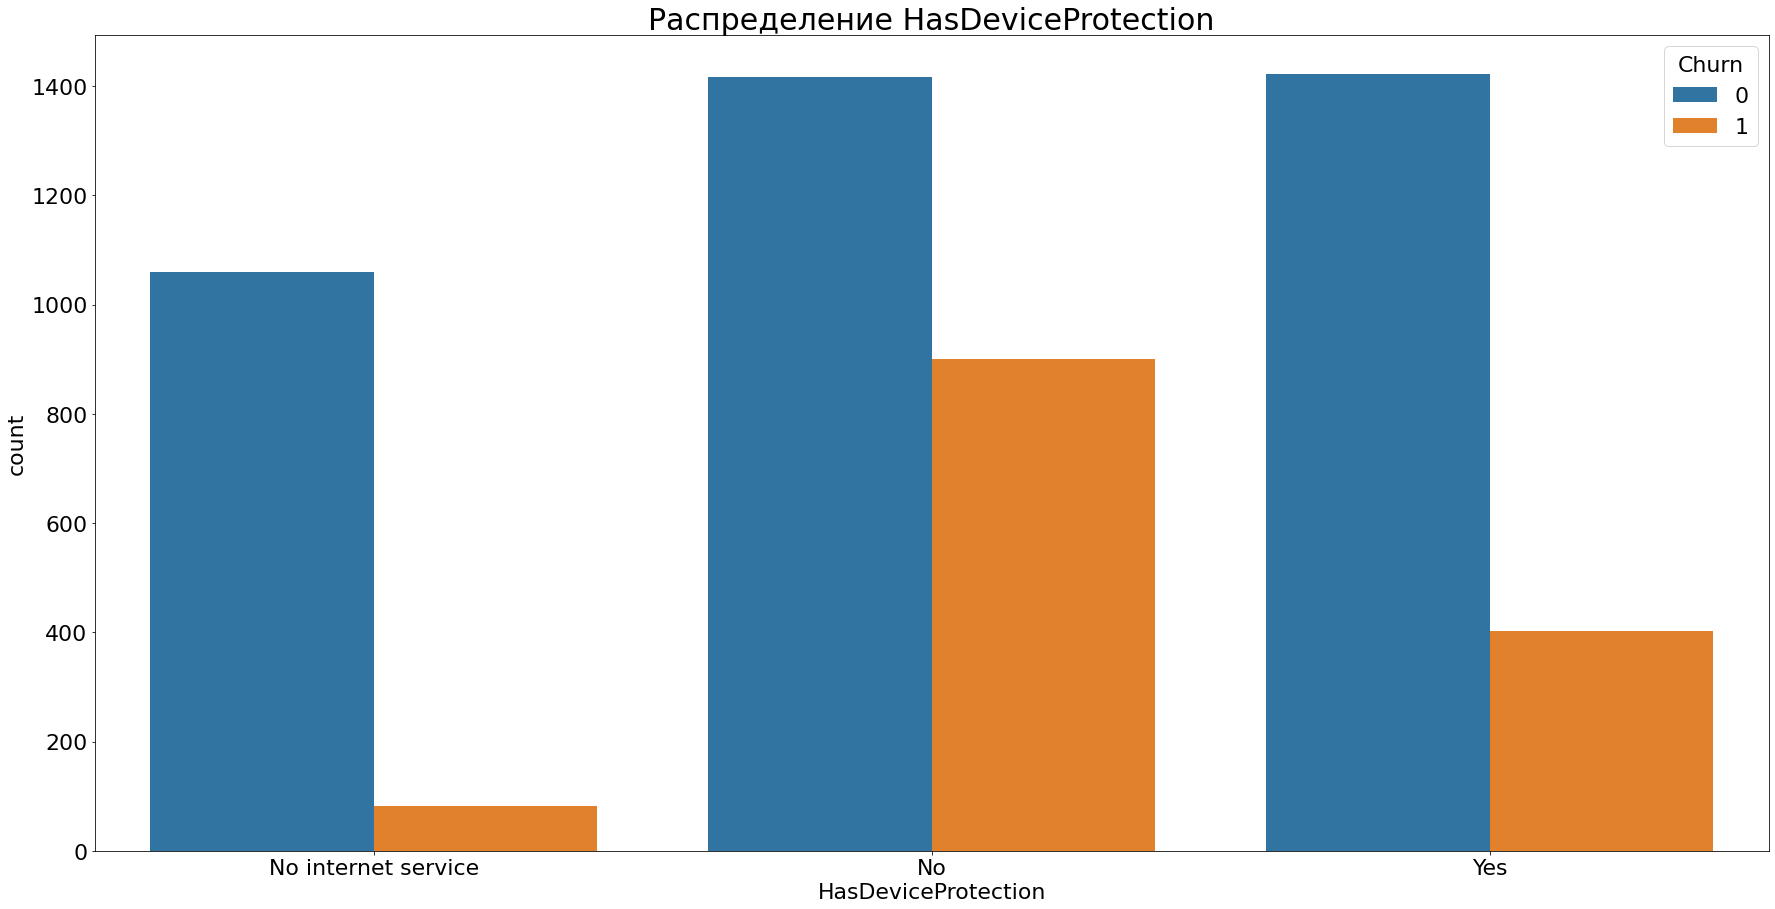

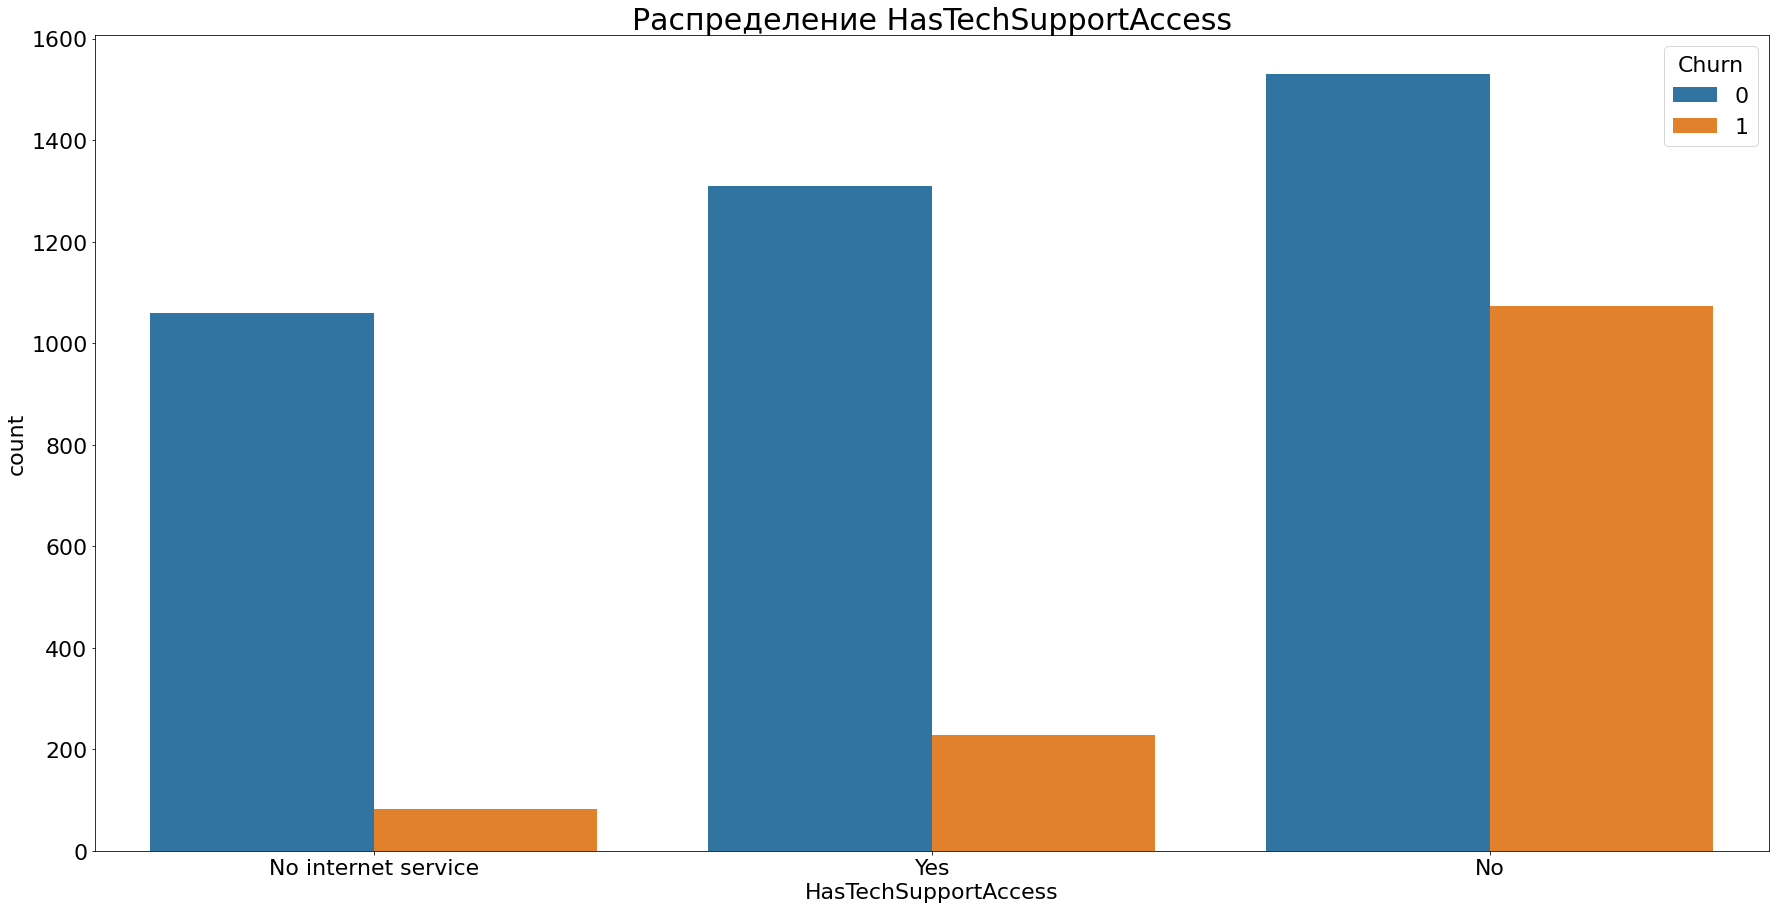

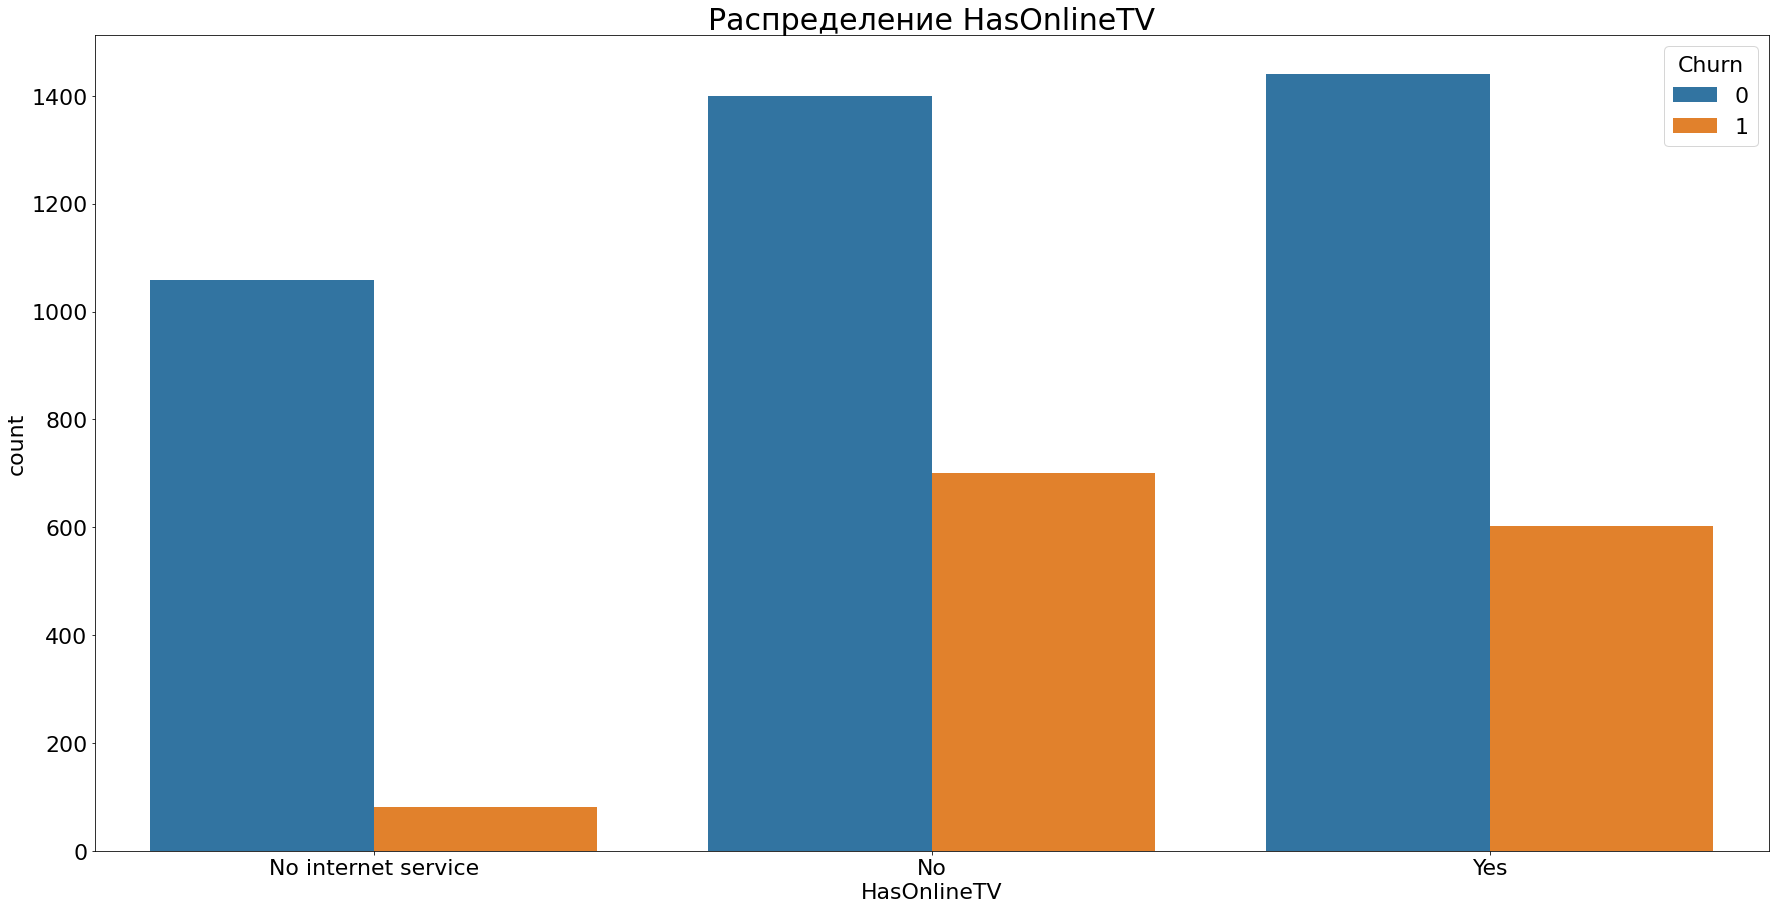

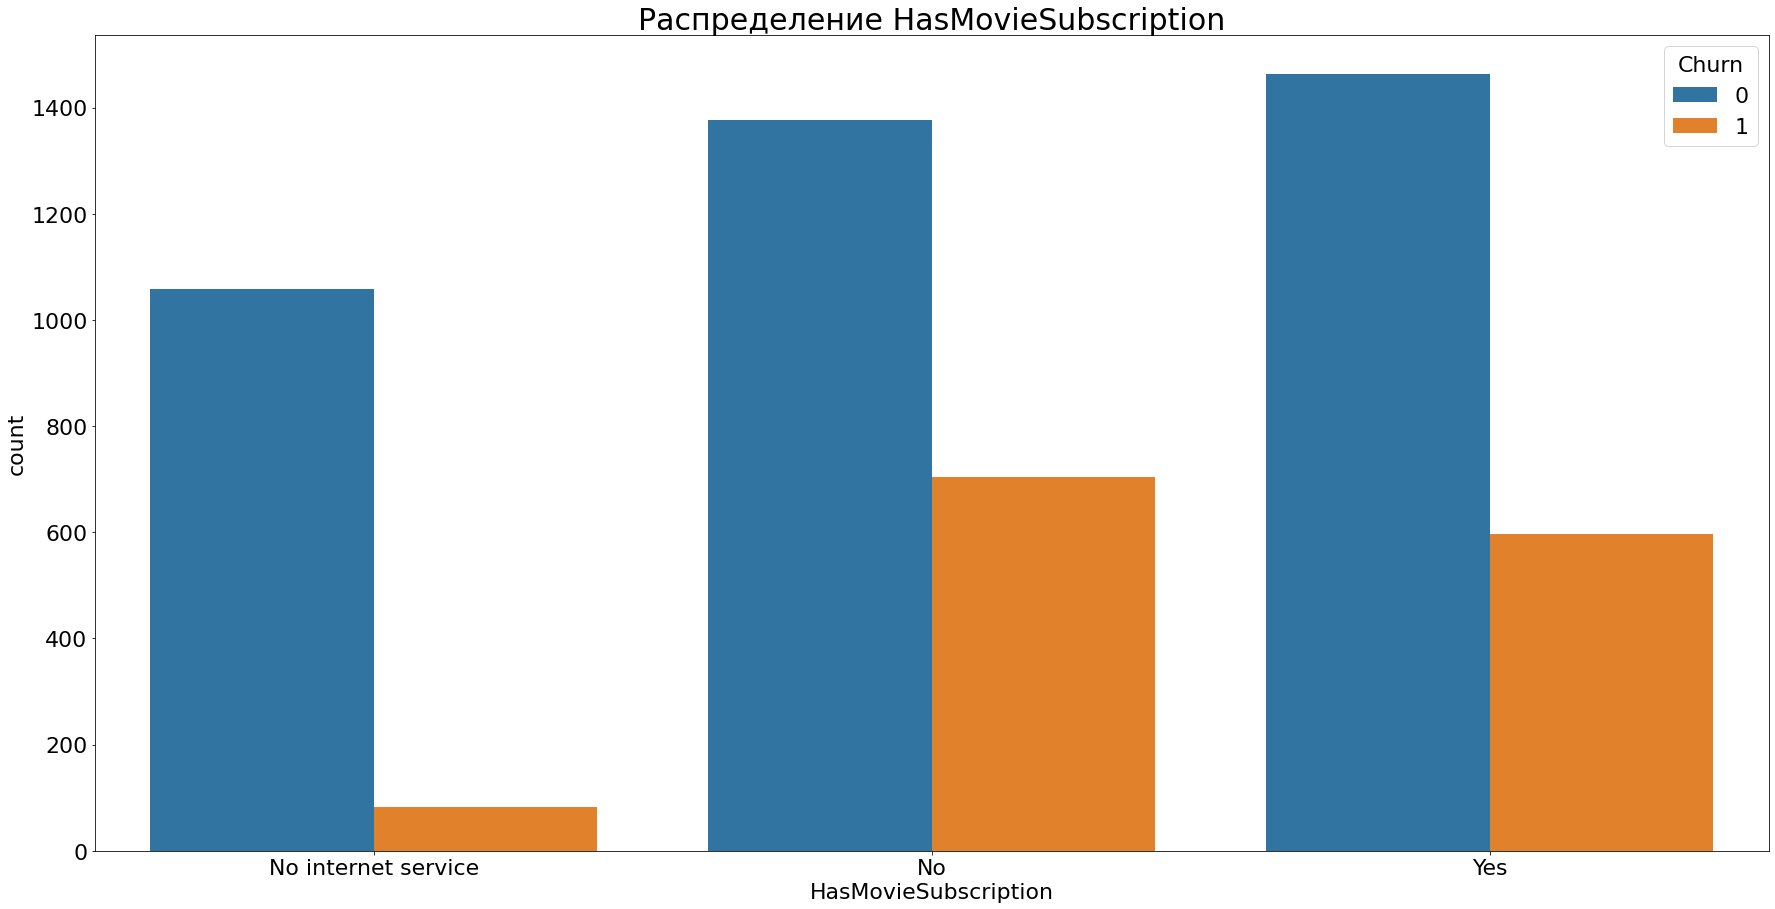

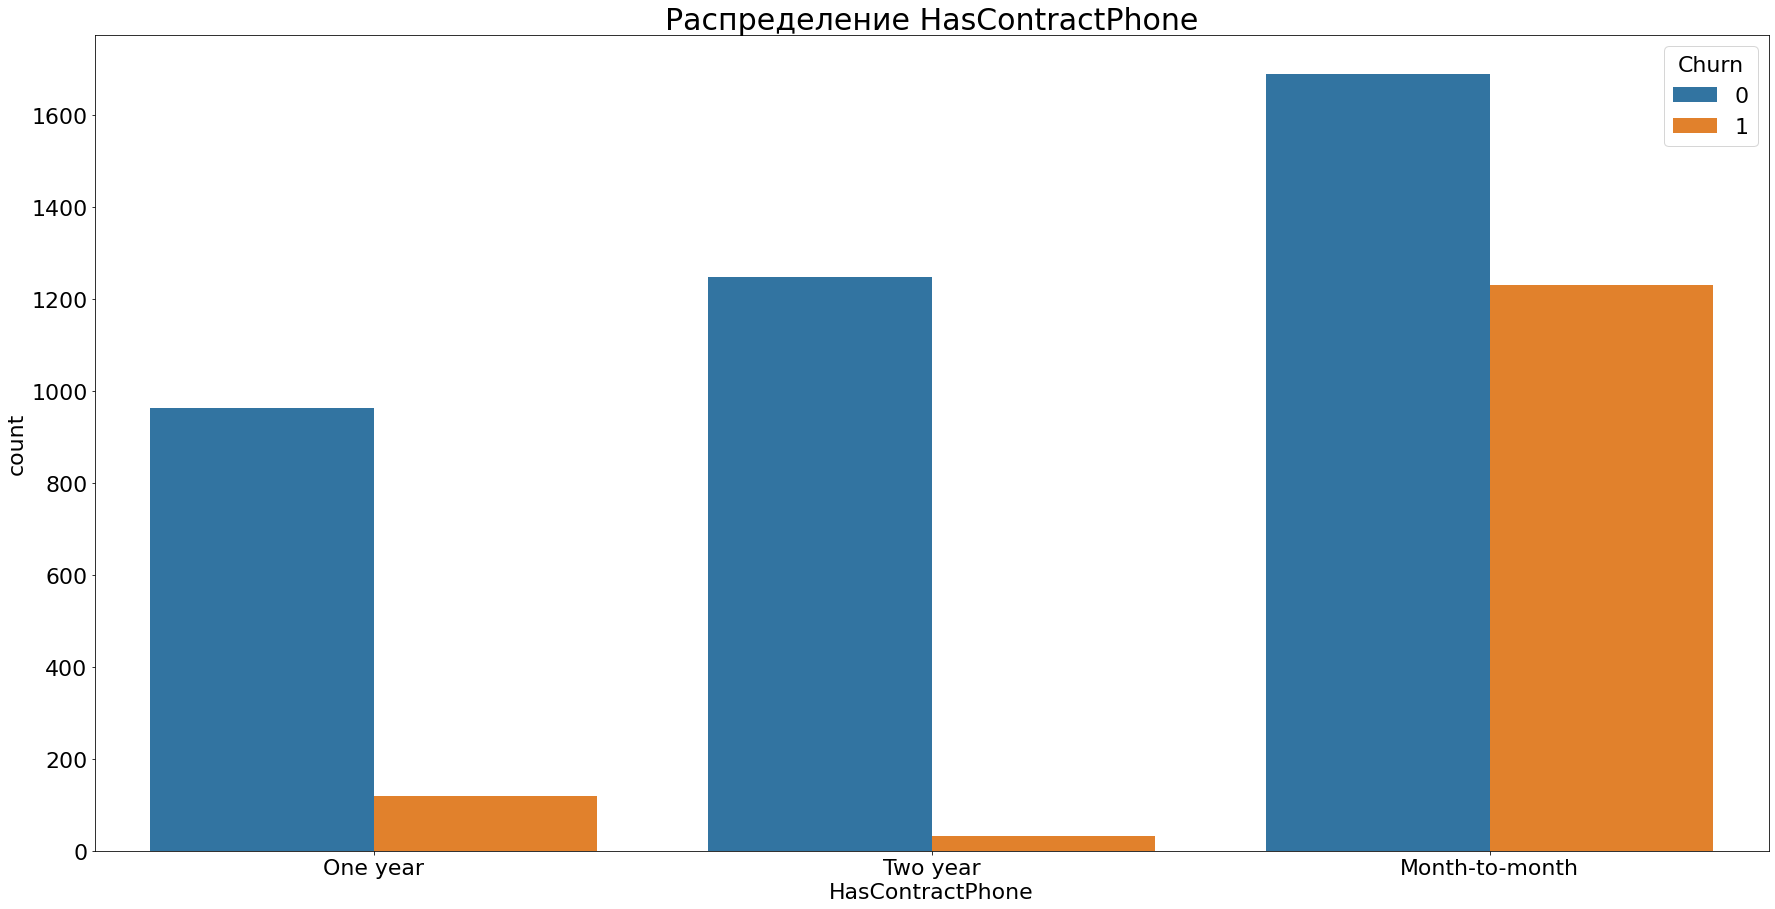

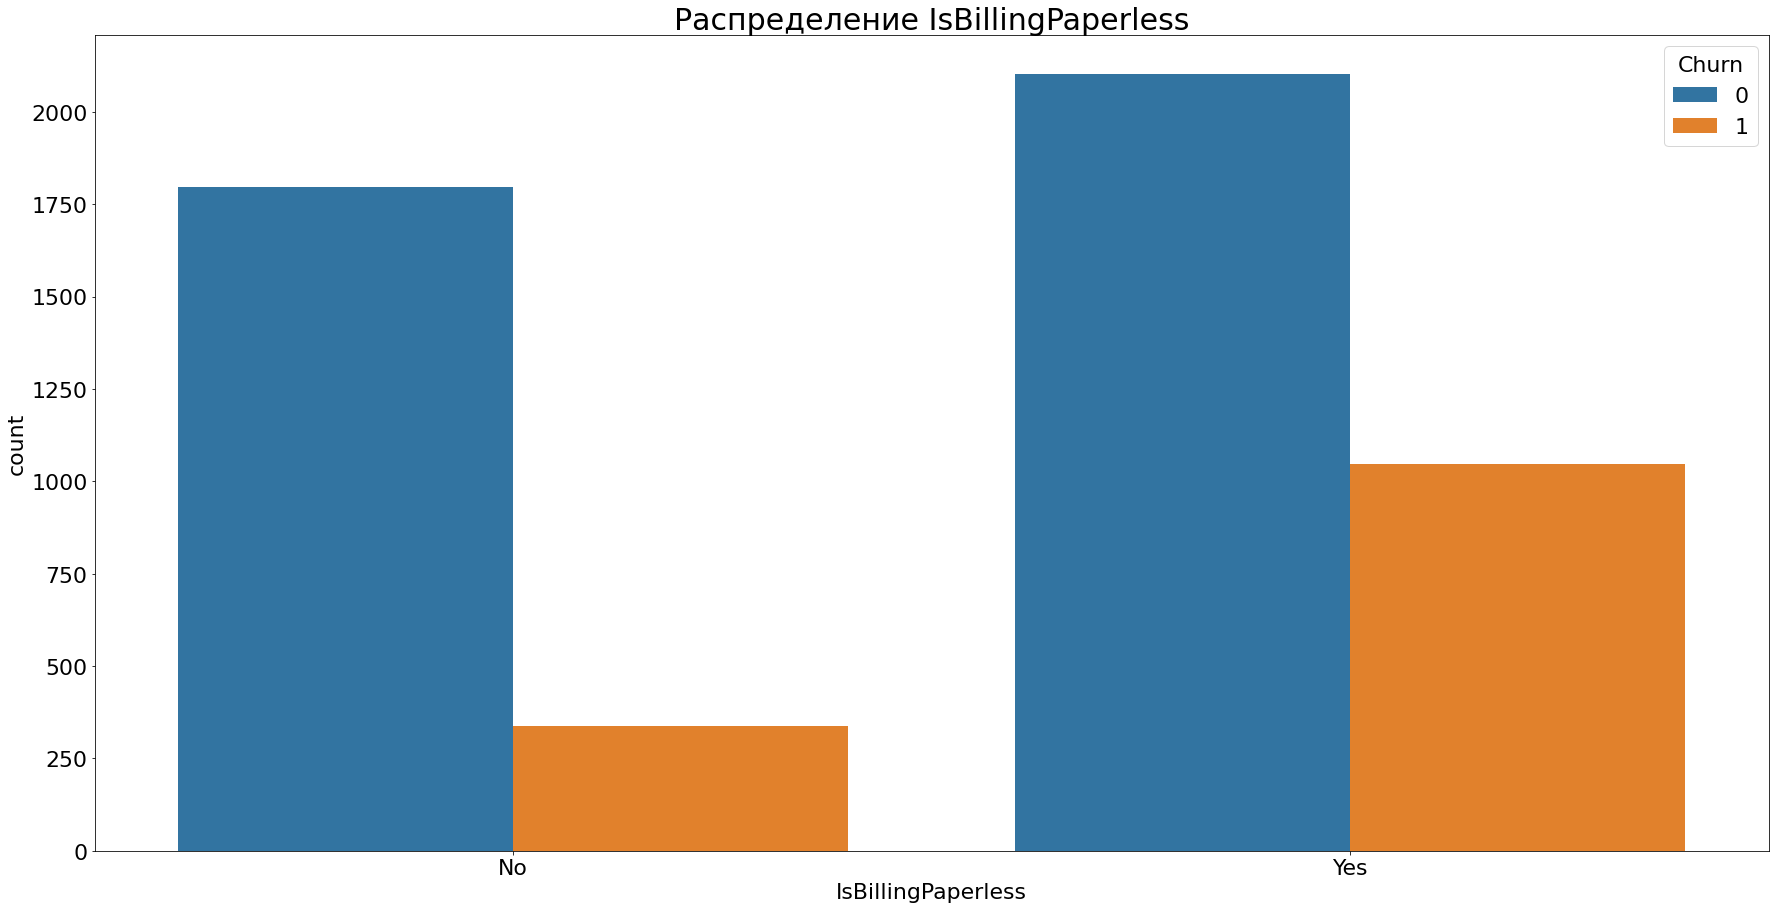

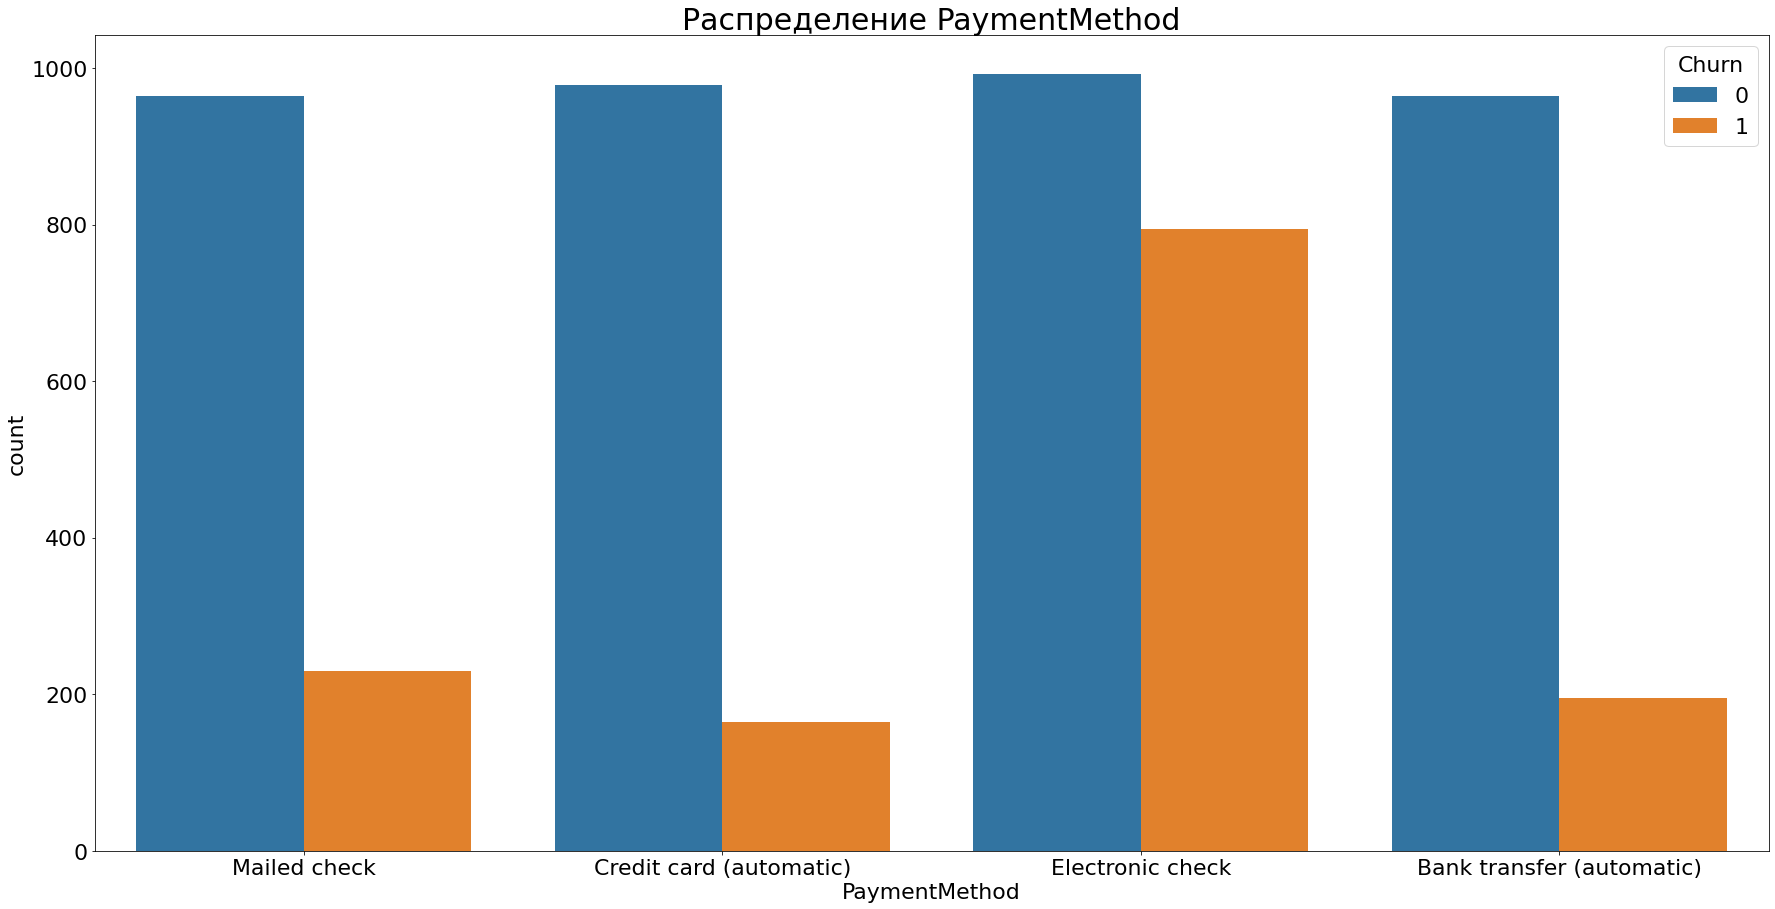

In [38]:
for col in cat_cols:
    sns.countplot(x=col, hue=target_col, data=data).set_title("Распределение " + col)
    plt.show()

In [40]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Значения целевого столбца несбалансированы

In [9]:
for col in cat_cols:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col, dtype=bool)], axis=1)
data.head().T

,0,1,2,3,4
ClientPeriod,55,72,1,32,60
MonthlySpending,19.5,25.85,75.9,79.3,115.25
TotalSpent,1026.35,1872.2,75.9,2570,6758.45
Sex,Male,Male,Male,Female,Female
IsSeniorCitizen,0,0,0,1,0
...,...,...,...,...,...
IsBillingPaperless_Yes,False,False,True,False,False
PaymentMethod_Bank transfer (automatic),False,False,False,False,False
PaymentMethod_Credit card (automatic),False,True,False,False,True
PaymentMethod_Electronic check,False,False,True,False,False


In [10]:
data.drop(cat_cols, axis=1, inplace=True)
data.head().T

,0,1,2,3,4
ClientPeriod,55,72,1,32,60
MonthlySpending,19.5,25.85,75.9,79.3,115.25
TotalSpent,1026.35,1872.2,75.9,2570,6758.45
Churn,0,0,1,0,0
Sex_Female,False,False,False,True,True
Sex_Male,True,True,True,False,False
IsSeniorCitizen_0,True,True,True,False,True
IsSeniorCitizen_1,False,False,False,True,False
HasPartner_No,False,False,True,False,False
HasPartner_Yes,True,True,False,True,True


In [11]:
from sklearn.model_selection import train_test_split

def get_test_and_valid(X, y):
    return train_test_split(X, y, test_size=0.25, random_state=1)

In [19]:
X = data.drop(["Churn"], axis=1)
y = data["Churn"]
X_train, X_valid, y_train, y_valid = get_test_and_valid(X, y)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [20]:
params = {
    "n_neighbors": np.arange(1, 11),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean"]
}
knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}

In [21]:
knn = KNeighborsClassifier(metric="manhattan", n_neighbors=10, weights="uniform")
knn.fit(X_train, y_train)
roc_auc_score(y_valid, knn.predict(X_valid))

0.6500615424672612

In [22]:
knn_result = knn.predict(X)
preprocessed = X
preprocessed["knn_result"] = knn_result
preprocessed[target_col] = y
preprocessed.to_csv(base_dir + "train_preprocessed.csv")

In [23]:
preprocessed.head().T

,0,1,2,3,4
ClientPeriod,55,72,1,32,60
MonthlySpending,19.5,25.85,75.9,79.3,115.25
TotalSpent,1026.35,1872.2,75.9,2570,6758.45
Sex_Female,False,False,False,True,True
Sex_Male,True,True,True,False,False
IsSeniorCitizen_0,True,True,True,False,True
IsSeniorCitizen_1,False,False,False,True,False
HasPartner_No,False,False,True,False,False
HasPartner_Yes,True,True,False,True,True
HasChild_No,False,True,True,True,False


In [24]:
pd.read_csv(base_dir + "train_preprocessed.csv").head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ClientPeriod,55,72,1,32,60
MonthlySpending,19.5,25.85,75.9,79.3,115.25
TotalSpent,1026.35,1872.2,75.9,2570,6758.45
Sex_Female,False,False,False,True,True
Sex_Male,True,True,True,False,False
IsSeniorCitizen_0,True,True,True,False,True
IsSeniorCitizen_1,False,False,False,True,False
HasPartner_No,False,False,True,False,False
HasPartner_Yes,True,True,False,True,True


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [35]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc', refit=True)
logreg.fit(X_train, y_train)
roc_auc_score(y_valid, logreg.predict(X_valid))

c:\users\александр\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\александр\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

0.6982421932788525

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.